In [1]:
import matplotlib.pyplot as plt 
from chess_gym.chess_env import ChessEnv, SinglePlayerChess
from chess_gym.wrapper import PieceMapWrapper, FenObsWrapper, RBGObsWrapper, UCIActionWrapper
import numpy as np

# Create a basic Chess environment

In [2]:
env = ChessEnv(render_mode="rgb_array")
wrapped_env = PieceMapWrapper(env)

Create possible actions: 100%|██████████| 9072/9072 [00:00<00:00, 1158282.12it/s]


# Reset the environment and get initial observation

In [3]:
obs, info = wrapped_env.reset()
print("Initial Observation (piece-map):\n", obs)

Initial Observation (piece-map):
 [[ 9 11 10  8  7 10 11  9]
 [12 12 12 12 12 12 12 12]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 6  6  6  6  6  6  6  6]
 [ 3  5  4  2  1  4  5  3]]


# Take a random action from the action space

In [4]:
available_actions = info["available_actions"]
action = available_actions[np.random.choice(len(available_actions))]
obs, reward, terminated, truncated, info = wrapped_env.step(action)
print("Next Observation (piece-map):\n", obs)
print("Reward:", reward)
print("Terminated:", terminated)


Next Observation (piece-map):
 [[ 9 11 10  8  7 10 11  9]
 [12 12 12 12 12 12 12 12]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0]
 [ 6  6  0  6  6  6  6  6]
 [ 3  5  4  2  1  4  5  3]]
Reward: 0
Terminated: False


# Demonstrate rendering

Rendered Board Shape: (400, 400, 4)


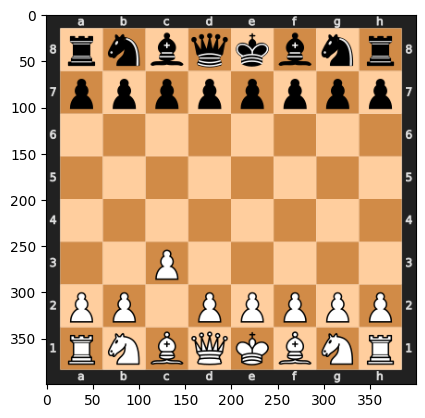

In [5]:
img = wrapped_env.render()
print("Rendered Board Shape:", img.shape)
plt.imshow(img)

# Apply RGB Wrapper

In [6]:
rgb_env = RBGObsWrapper(env)
rgb_obs, _ = rgb_env.reset()
print("RGB Observation Shape:", rgb_obs.shape)


RGB Observation Shape: (3, 400, 400)


# Apply UCI Action Wrapper

In [7]:
uci_env = UCIActionWrapper(env)
uci_action = "e2e4"
obs, reward, terminated, truncated, info = uci_env.step(uci_action)
print("Played move:", uci_action)
print("Updated Board FEN:", env.board.fen())

Create possible actions: 100%|██████████| 9072/9072 [00:00<00:00, 1352818.50it/s]

Played move: e2e4
Updated Board FEN: rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1


# Close the environment

In [8]:
wrapped_env.close()

# Single Player Env

Create possible actions: 100%|██████████| 9072/9072 [00:00<00:00, 1412791.96it/s]


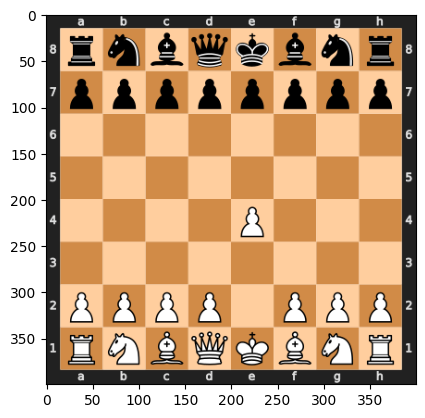

In [11]:
env = SinglePlayerChess(render_mode="rgb_array")
obs, _ = env.reset(player_starts=False)

plt.imshow(img)